<a href="https://colab.research.google.com/github/dauparas/tensorflow_examples/blob/master/machine_learning_bishop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This is a notebook for reading "Pattern Recognition and Machine Learning" by Christopher M. Bishop.

# Chapter 1: Introduction

**Pattern recognition is fundamental to mathematics and science.** For example given a sequence of numbers $1, 3, 5, 7,...$ one can easily spot that the next number is generated by adding $2$ to the previous number. One could also see a pattern in an oscillating simple pendulum. The period of the pendulum for small oscillations is given by $T = 2\pi \sqrt{L/g}$ where $L$ is the length of the pendulum and $g$ acceleration due to gravity. Spotting patterns allows us to predict the future!


---


The field of patern recognition is concerned with the automatic discovery of regularities in the data through the use of computer algorithms. Generalization is a central goal in pattern recognition.


---

Supervised learning: classification, regression.

Unsupervised learning: clusterring, density estimation, visualization.

Reinforcement learning.

# 1.1 Example: Polynomial Curve Fitting

In [0]:
#Import libraries
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [0]:
x = np.linspace(0, 1, 11)
N = x.shape[0]
y = np.sin(2*np.pi*x) + 0.2*np.random.randn(N)

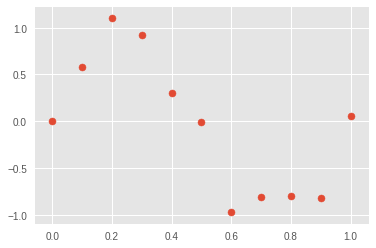

In [225]:
plt.scatter(x, y);

In [0]:
#Helper function
def batch_generator(features, labels, batch_size):
  """Function to create python generator to shuffle and split features and labels into batches along the first dimension."""
  idx = np.arange(features.shape[0])
  np.random.shuffle(idx)
  for start_idx in range(0, features.shape[0], batch_size):
    end_idx = min(start_idx + batch_size, features.shape[0])
    part = idx[start_idx:end_idx]
    yield features[part], labels[part]

In [0]:
#Reset the graph 
tf.reset_default_graph()

#Polynomial degree + 1
#P = 2 is a linear function.
P = 5

x_poly = []
for i in range(P):
  x1 = np.power(x, i)
  x_poly.append(x1)

x_poly = np.asarray(x_poly).T
  

#Parameters
learning_rate = 0.5
batch_size = 11
n_epochs = 1000

#Create placeholders
X = tf.placeholder(tf.float32, shape=[None, P], name='X')
Y = tf.placeholder(tf.float32, shape=[None], name='Y')
#Create variables
A = tf.get_variable('A', shape=[P], dtype=tf.float32, initializer=tf.random_normal_initializer())

#Create a linear model
y_pred = tf.einsum('i, ki->k', A, X)

#Define a loss function
loss = 0.5*tf.reduce_sum(tf.square(y_pred-Y), axis=0)

#Define an optimizer
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(loss)

In [281]:
#Create a TF session:
with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  for i in range(n_epochs):
    gen = batch_generator(x_poly, y, batch_size) #create batch generator
    total_loss = 0
    for j in range(np.int(x.shape[0]/batch_size)):
      x_batch, y_batch = gen.__next__()
      _, batch_loss = sess.run([optimizer, loss], feed_dict={X: x_batch, Y: y_batch})
      total_loss += batch_loss
    if (i+1)% 50 == 0 or i == 0:
      print('Epoch: {0}, Loss: {1}'.format((i+1), total_loss))
    a = sess.run([A])
    a = np.squeeze(np.asarray(a))

Epoch: 1, Loss: 1.7628687620162964
Epoch: 50, Loss: 1.0776453018188477
Epoch: 100, Loss: 0.8971936702728271
Epoch: 150, Loss: 0.7268416881561279
Epoch: 200, Loss: 0.5783424973487854
Epoch: 250, Loss: 0.4613321125507355
Epoch: 300, Loss: 0.37610122561454773
Epoch: 350, Loss: 0.3179941773414612
Epoch: 400, Loss: 0.2806071639060974
Epoch: 450, Loss: 0.25773924589157104
Epoch: 500, Loss: 0.24432328343391418
Epoch: 550, Loss: 0.23666603863239288
Epoch: 600, Loss: 0.23230409622192383
Epoch: 650, Loss: 0.2297145128250122
Epoch: 700, Loss: 0.22801917791366577
Epoch: 750, Loss: 0.22674143314361572
Epoch: 800, Loss: 0.22563858330249786
Epoch: 850, Loss: 0.22459480166435242
Epoch: 900, Loss: 0.22355705499649048
Epoch: 950, Loss: 0.22250351309776306
Epoch: 1000, Loss: 0.22142621874809265


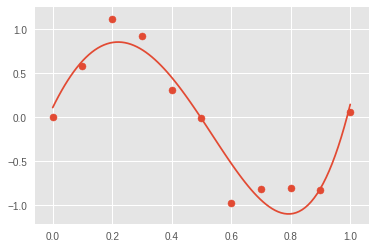

In [282]:
p = np.poly1d(a[::-1])
x_eval = np.linspace(0,1, 100)
plt.plot(x_eval, p(x_eval))
plt.scatter(x, y);